In [22]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import time

In [2]:
import sys
sys.path.append("../code")
import model_agegroups
import plotting
import plotting_agegroups
import parameters_agegroups

In [3]:
params_m1 = parameters_agegroups.get_params(scen=1)
params_m2 = parameters_agegroups.get_params(scen=2)
params_m3 = parameters_agegroups.get_params(scen=3)
params_m4 = parameters_agegroups.get_params(scen=4)
params_m5 = parameters_agegroups.get_params(scen=5)
params_mfull = parameters_agegroups.get_params(scen=1)

In [4]:
params_mfull.update({'feedback_off': True,
                     'alpha_w':0,
                     'alpha_u':0
                    })

In [5]:
m1 = model_agegroups.Model(**params_m1)
m2 = model_agegroups.Model(**params_m2)
m3 = model_agegroups.Model(**params_m3)
m4 = model_agegroups.Model(**params_m4)
m5 = model_agegroups.Model(**params_m5)
mfull = model_agegroups.Model(**params_mfull)

In [6]:
start_time = time.time()
times, data = m1.run()
print(time.time() - start_time)
times, data = m2.run()
print(time.time() - start_time)
times, data = m3.run()
print(time.time() - start_time)
times, data = m4.run()
print(time.time() - start_time)
times, data = m5.run()
print(time.time() - start_time)

44.852848052978516
89.93357586860657
136.7144067287445
182.10863208770752
227.22333478927612


In [7]:
times, data = mfull.run()

In [8]:
[(m.chopped_data() < 0 ).any() for m in [m1,m2,m3,m4,m5]]

[False, False, False, False, False]

In [9]:
m1.save("./pickle/m1_09_11.pickle")
m2.save("./pickle/m2_09_11.pickle")
m3.save("./pickle/m3_09_11.pickle")
m4.save("./pickle/m4_09_11.pickle")
m5.save("./pickle/m5_09_11.pickle")
mfull.save("./pickle/mfull_09_11.pickle")

In [10]:
m1 = model_agegroups.Model.load("./pickle/m1_09_11.pickle")
m2 = model_agegroups.Model.load("./pickle/m2_09_11.pickle")
m3 = model_agegroups.Model.load("./pickle/m3_09_11.pickle")
m4 = model_agegroups.Model.load("./pickle/m4_09_11.pickle")
m5 = model_agegroups.Model.load("./pickle/m5_09_11.pickle")
mfull = model_agegroups.Model.load("./pickle/mfull_09_11.pickle")

In [11]:
print('Possible plotting arguments\n:')
print('NPI', 'Rt_OBS', 'Rt_EV', 'Incidence', 'ICU', 'Vaccines', 'Immunity', 'Deaths', 'Cosmo', 'Romania', 'Patients')


Possible plotting arguments
:
NPI Rt_OBS Rt_EV Incidence ICU Vaccines Immunity Deaths Cosmo Romania Patients


In [12]:
figure2 = {
    'ax1': 'NPI',
    'ax2': 'Incidence',
    'ax3': 'ICU',
    'ax4': 'Vaccines',
    'ax5': 'Immunity',
    'ax6': 'Deaths'
}

figure3 = {
    'ax1': 'NPI',
    'ax2': 'Incidence',
    'ax3': 'ICU',
    'ax4': 'Vaccines',
    'ax5': 'Immunity',
    'ax6': 'Deaths'
}

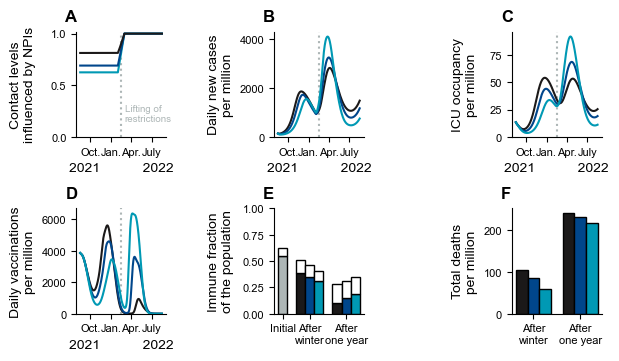

In [24]:
import importlib
importlib.reload(plotting_agegroups)
plotting_agegroups.sixpanels_flexible([m2,m3,m4], figure3, "./figures/show.pdf", arial=True)
#, full_wave=mfull

In [14]:
importlib.reload(plotting_agegroups)
plotting_agegroups.overview_agegroups(m1, path='./figures/AG_scen1.pdf', arial=True, silent=False)
plotting_agegroups.overview_agegroups(m2, path='./figures/AG_scen2.pdf', arial=True, silent=False)
plotting_agegroups.overview_agegroups(m3, path='./figures/AG_scen3.pdf', arial=True, silent=False)
plotting_agegroups.overview_agegroups(m4, path='./figures/AG_scen4.pdf', arial=True, silent=False)
plotting_agegroups.overview_agegroups(m5, path='./figures/AG_scen5.pdf', arial=True, silent=False)

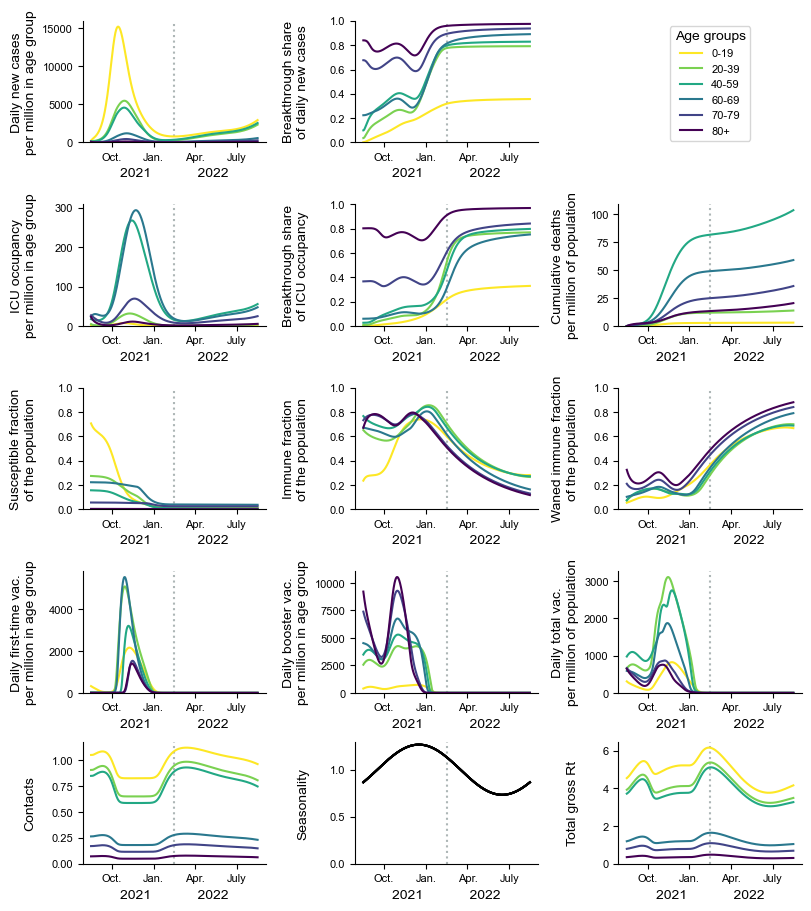

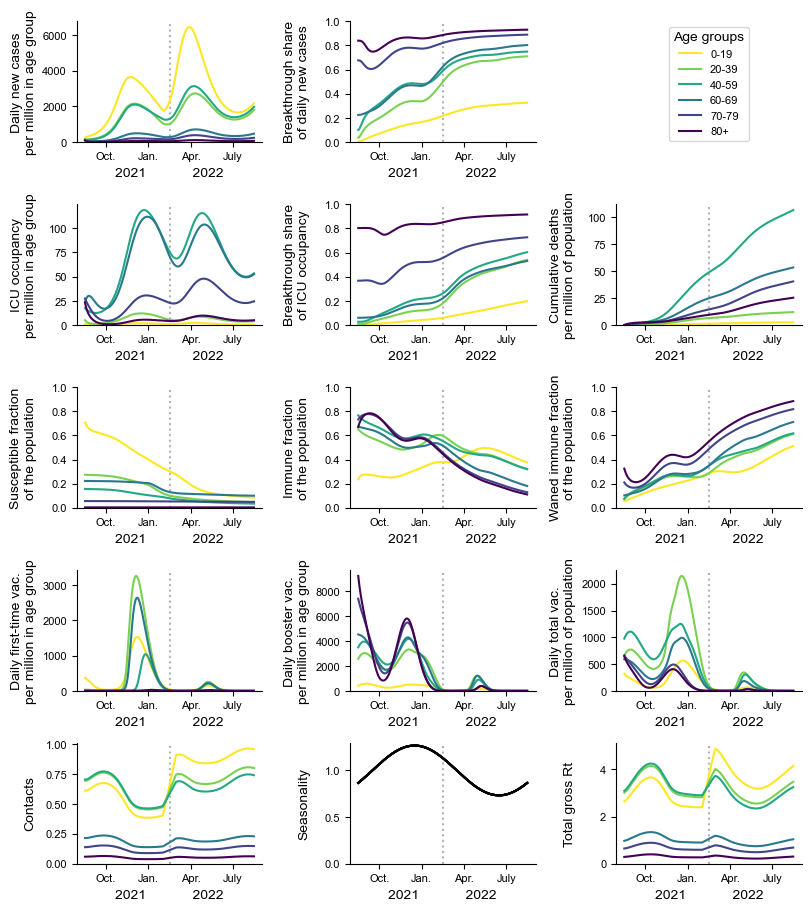

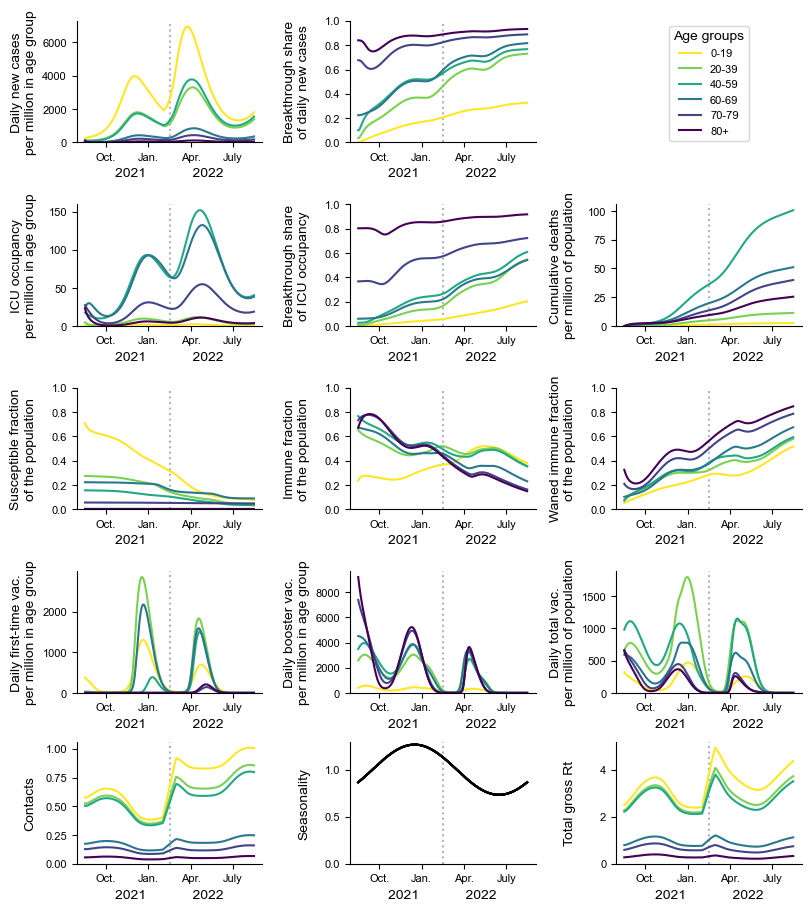

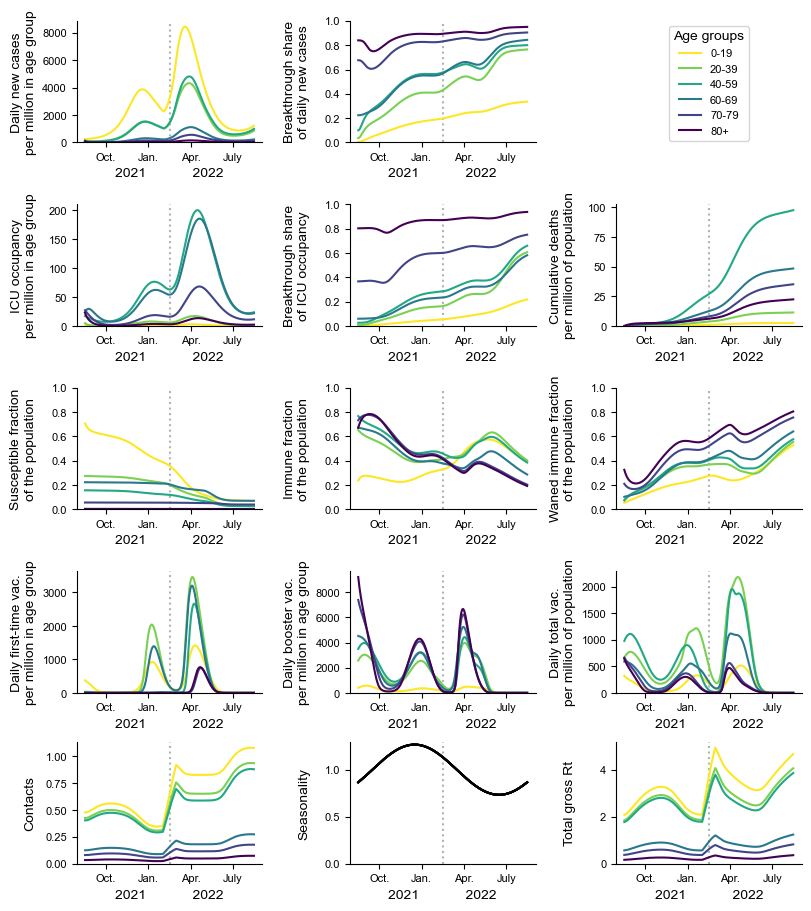

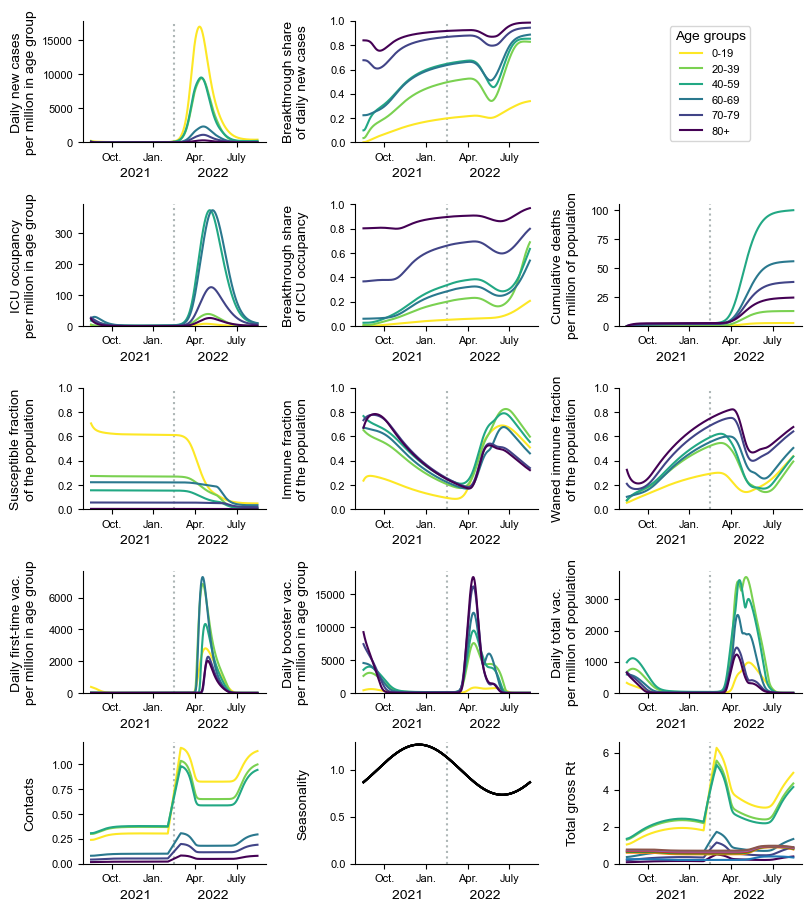

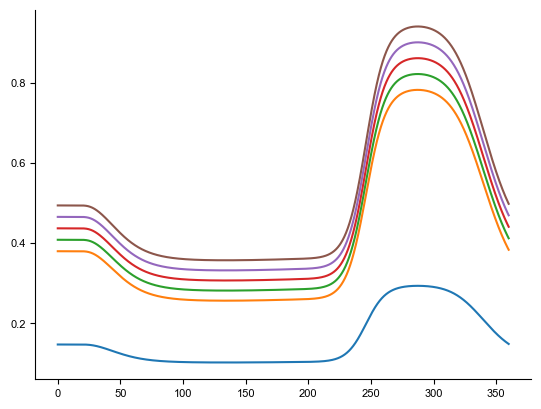

In [15]:
t=np.linspace(0,360,3600)

plt.plot(t,list(map(m5.u_w,t)))
plt.show()

plt.plot(t, list(map(m5.w_w,t)))
plt.show()

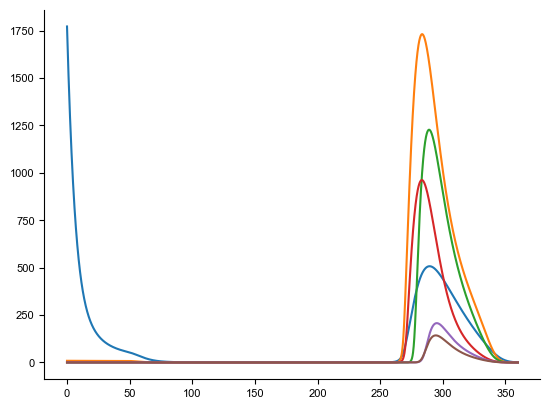

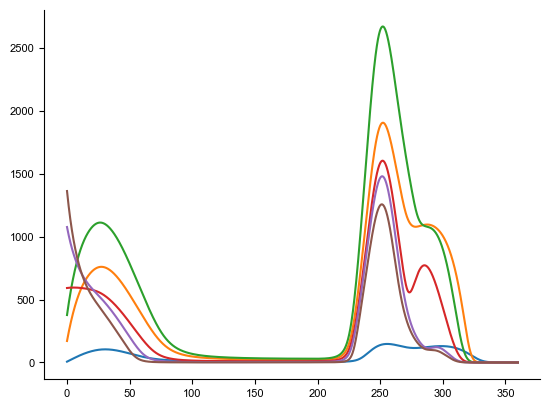

In [16]:
UC = m5.chopped_data()[:,14]
WC = m5.chopped_data()[:,15] 

frac_u = (m5.chopped_data()[:,0] +m5.chopped_data()[:,2])/(m5.M-UC)
frac_w = (m5.chopped_data()[:,3])/(UC-WC) 

plt.plot(t, list(map(m5.Phi,t, UC, frac_u )))
plt.show()

plt.plot(t, list(map(m5.phi,t, UC, WC, frac_w)))
plt.show()


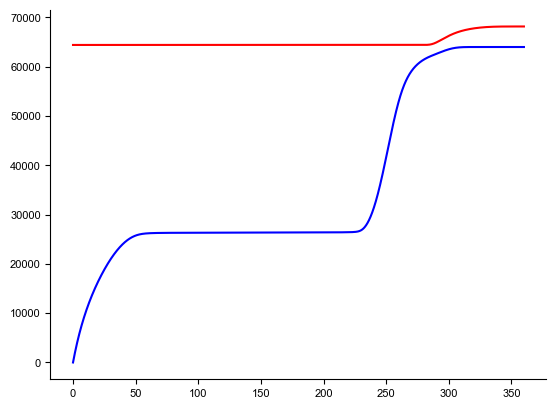

In [17]:
plt.plot(t,np.moveaxis(UC,0,1)[5], color='red')
plt.plot(t,np.moveaxis(WC,0,1)[5], color='blue')
plt.show()

In [18]:
np.min(UC-WC)

2298.4363927844242

In [19]:
test = [[1,2,3], [4,5,6]]

np.moveaxis(test,0,1)[0]

array([1, 4])

In [20]:
def new_sr(t):
    a = -(m1.fit_HR-m1.fit_LR)/m1.fit_ICUcap
    b = m1.fit_HR-m1.fit_LR
    return (m1.H_Rt(t)[0]<m1.fit_ICUcap) * (a*m1.H_Rt(t)[0]+b) + m1.fit_LR

In [21]:
a = -(m1.fit_HR-m1.fit_LR)/m1.fit_ICUcap
b = m1.fit_HR-m1.fit_LR
(m1.H_Rt(0)<m1.fit_ICUcap) * (a*m1.H_Rt(t)+b) + m1.fit_LR

AttributeError: 'Model' object has no attribute 'fit_HR'

In [ ]:
x = np.linspace(0,360,1000)
plt.plot(x,5*m1.Gamma(x))
plt.show()